<a href="https://colab.research.google.com/github/karthikaperumal2003/patient-health-monitoring/blob/main/patient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Health-Monitoring-system-by-using-Machine-Learning-main/Health-Monitoring-system-by-using-Machine-Learning-main/health.csv')

In [ ]:
data.head()

,created_at,entry_id,field1,field2,field3,field4,field5
0,2024-04-22T14:31:41+05:30,1,76.00000,15.00000,32.00000,1,15.00000
1,2024-04-22T14:32:30+05:30,2,70.00000,15.00000,37.00000,1,15.00000
2,2024-04-22T14:33:47+05:30,3,81.99222,12.25635,37.00000,0,32.29345
3,2024-04-22T14:34:47+05:30,4,81.99222,14.36866,39.54149,0,241.09470
4,2024-04-22T14:35:45+05:30,5,70.00000,15.00000,37.00000,1,15.00000


In [ ]:
data.tail()


,created_at,entry_id,field1,field2,field3,field4,field5
160,2024-04-23T09:23:39+05:30,161,75.0,14.0,37.0,0,45.0
161,2024-04-23T09:23:58+05:30,162,75.0,14.0,37.0,0,45.0
162,2024-04-23T09:27:15+05:30,163,69.0,14.0,37.0,1,70.0
163,2024-04-23T09:27:40+05:30,164,89.0,19.0,37.6,1,90.0
164,2024-04-23T09:28:37+05:30,165,69.0,10.0,37.3,0,80.0


In [ ]:
data.fillna(0,inplace=True)
data

,created_at,entry_id,field1,field2,field3,field4,field5
0,2024-04-22T14:31:41+05:30,1,76.00000,15.00000,32.00000,1,15.00000
1,2024-04-22T14:32:30+05:30,2,70.00000,15.00000,37.00000,1,15.00000
2,2024-04-22T14:33:47+05:30,3,81.99222,12.25635,37.00000,0,32.29345
3,2024-04-22T14:34:47+05:30,4,81.99222,14.36866,39.54149,0,241.09470
4,2024-04-22T14:35:45+05:30,5,70.00000,15.00000,37.00000,1,15.00000
...,...,...,...,...,...,...,...
160,2024-04-23T09:23:39+05:30,161,75.00000,14.00000,37.00000,0,45.00000
161,2024-04-23T09:23:58+05:30,162,75.00000,14.00000,37.00000,0,45.00000
162,2024-04-23T09:27:15+05:30,163,69.00000,14.00000,37.00000,1,70.00000
163,2024-04-23T09:27:40+05:30,164,89.00000,19.00000,37.60000,1,90.00000


In [ ]:
data.describe()

,entry_id,field1,field2,field3,field4,field5
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,83.000000,77.454519,14.224604,37.489408,0.278788,131.927535
std,47.775517,15.882990,4.806646,1.156761,0.449768,151.431043
min,1.000000,60.000000,10.000000,32.000000,0.000000,2.006550
25%,42.000000,60.000000,10.000000,37.000000,0.000000,40.353950
50%,83.000000,75.000000,13.106130,37.000000,0.000000,51.450000
75%,124.000000,90.000000,16.586100,37.800000,1.000000,150.000000
max,165.000000,120.000000,36.000000,40.600000,1.000000,403.505200


In [ ]:
data.rename(columns={'entry_id':'patient_ID','field1':'heart_rate','field2':'respiratory_rate','field3':'temperature','field4':'PIR Trigger','field5':'distance'},inplace=True)

In [ ]:
data.head()

,created_at,patient_ID,heart_rate,respiratory_rate,temperature,PIR Trigger,distance
0,2024-04-22T14:31:41+05:30,1,76.00000,15.00000,32.00000,1,15.00000
1,2024-04-22T14:32:30+05:30,2,70.00000,15.00000,37.00000,1,15.00000
2,2024-04-22T14:33:47+05:30,3,81.99222,12.25635,37.00000,0,32.29345
3,2024-04-22T14:34:47+05:30,4,81.99222,14.36866,39.54149,0,241.09470
4,2024-04-22T14:35:45+05:30,5,70.00000,15.00000,37.00000,1,15.00000


In [ ]:
data.isnull().sum()

created_at          0
patient_ID          0
heart_rate          0
respiratory_rate    0
temperature         0
PIR Trigger         0
distance            0
dtype: int64

In [ ]:
data['temperature'].value_counts()

temperature
37.00000    102
39.54149     21
37.98767      4
37.60000      3
37.50000      3
37.80000      3
38.80000      2
39.50000      2
36.40000      2
36.70000      1
36.90000      1
36.30000      1
32.00000      1
35.00000      1
38.20000      1
36.80000      1
38.85750      1
37.47284      1
36.20000      1
36.10000      1
35.50000      1
36.00000      1
38.10000      1
38.30000      1
36.50000      1
40.60000      1
40.20000      1
40.50000      1
40.00000      1
38.00000      1
39.80000      1
37.30000      1
Name: count, dtype: int64

In [ ]:

data.shape

(165, 7)

In [ ]:
data = data.convert_dtypes({'created_at': 'int64', 'patient_ID': 'int64', 'heart_rate': 'int64', 'respiratory_rate': 'int64', 'temperature': 'int64', 'PIR Trigger': 'int4', 'distance': 'int64'})

In [ ]:
data


,created_at,patient_ID,heart_rate,respiratory_rate,temperature,PIR Trigger,distance
0,2024-04-22T14:31:41+05:30,1,76.0,15.0,32.0,1,15.0
1,2024-04-22T14:32:30+05:30,2,70.0,15.0,37.0,1,15.0
2,2024-04-22T14:33:47+05:30,3,81.99222,12.25635,37.0,0,32.29345
3,2024-04-22T14:34:47+05:30,4,81.99222,14.36866,39.54149,0,241.0947
4,2024-04-22T14:35:45+05:30,5,70.0,15.0,37.0,1,15.0
...,...,...,...,...,...,...,...
160,2024-04-23T09:23:39+05:30,161,75.0,14.0,37.0,0,45.0
161,2024-04-23T09:23:58+05:30,162,75.0,14.0,37.0,0,45.0
162,2024-04-23T09:27:15+05:30,163,69.0,14.0,37.0,1,70.0
163,2024-04-23T09:27:40+05:30,164,89.0,19.0,37.6,1,90.0


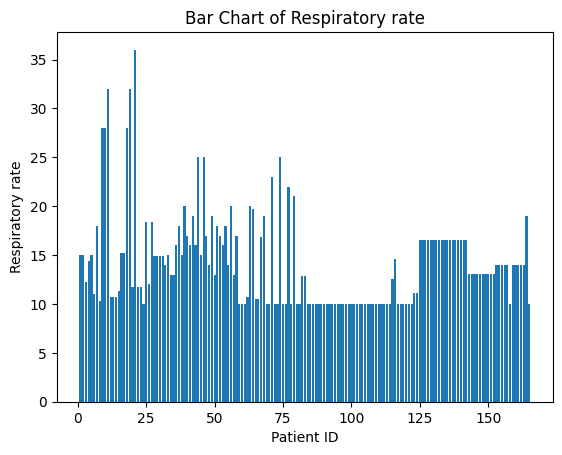

In [ ]:
plt.bar(data['patient_ID'],data['respiratory_rate'])
plt.title("Bar Chart of Respiratory rate")
plt.xlabel('Patient ID')
plt.ylabel('Respiratory rate')
plt.show()

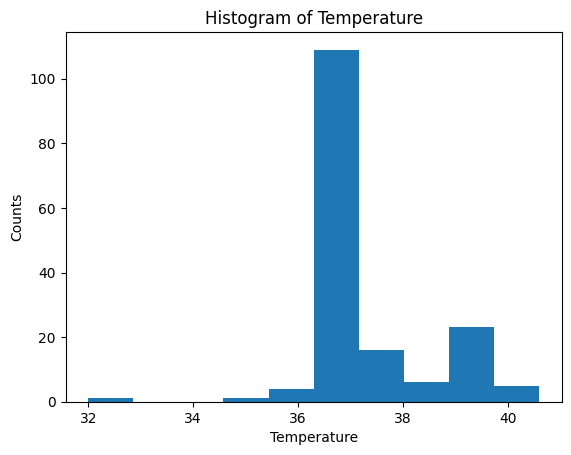

In [ ]:
plt.hist(data['temperature'])
plt.title("Histogram of Temperature")
plt.xlabel('Temperature')
plt.ylabel('Counts')
plt.show()

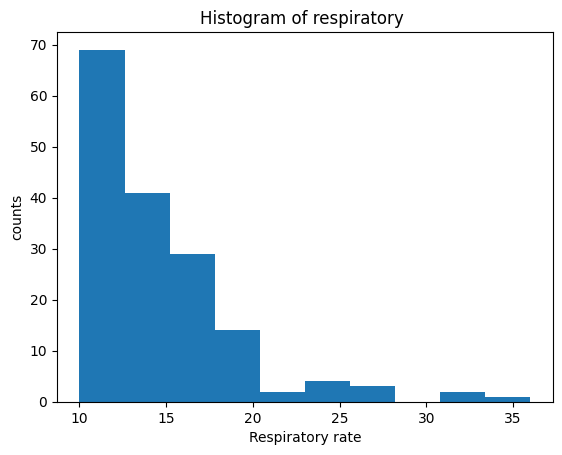

In [ ]:
plt.hist(data['respiratory_rate'])
plt.title("Histogram of respiratory ")
plt.ylabel('counts')
plt.xlabel('Respiratory rate')
plt.show()

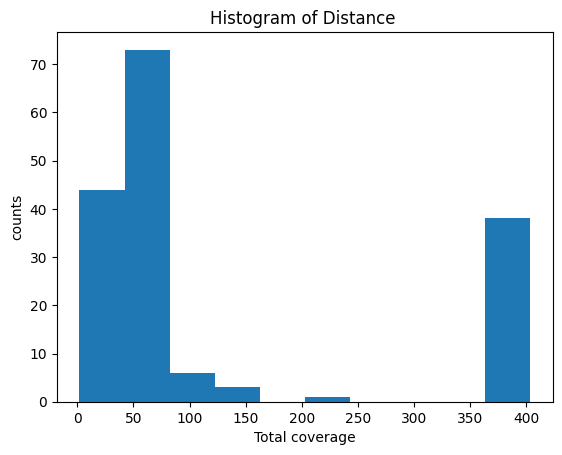

In [ ]:
plt.hist(data['distance'])
plt.title("Histogram of Distance ")
plt.xlabel('Total coverage')
plt.ylabel('counts')
plt.show()

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named df with the provided data
# Convert float columns to integer columns
data['heart_rate'] = data['heart_rate'].astype(int)
data['respiratory_rate'] = data['respiratory_rate'].astype(int)
data['temperature'] = data['temperature'].astype(int)
data['PIR Trigger'] = data['PIR Trigger'].astype(int)
data['distance'] = data['distance'].astype(int)

# Display the updated DataFrame
print(data)


                    created_at  patient_ID  heart_rate  respiratory_rate  \
0    2024-04-22T14:31:41+05:30           1          76                15   
1    2024-04-22T14:32:30+05:30           2          70                15   
2    2024-04-22T14:33:47+05:30           3          81                12   
3    2024-04-22T14:34:47+05:30           4          81                14   
4    2024-04-22T14:35:45+05:30           5          70                15   
..                         ...         ...         ...               ...   
160  2024-04-23T09:23:39+05:30         161          75                14   
161  2024-04-23T09:23:58+05:30         162          75                14   
162  2024-04-23T09:27:15+05:30         163          69                14   
163  2024-04-23T09:27:40+05:30         164          89                19   
164  2024-04-23T09:28:37+05:30         165          69                10   

     temperature  PIR Trigger  distance  
0             32            1        15  
1  

In [ ]:
data.head()

,created_at,patient_ID,heart_rate,respiratory_rate,temperature,PIR Trigger,distance
0,2024-04-22T14:31:41+05:30,1,76,15,32,1,15
1,2024-04-22T14:32:30+05:30,2,70,15,37,1,15
2,2024-04-22T14:33:47+05:30,3,81,12,37,0,32
3,2024-04-22T14:34:47+05:30,4,81,14,39,0,241
4,2024-04-22T14:35:45+05:30,5,70,15,37,1,15


In [ ]:
# prompt: Using dataframe data: covert the float to interger without decimal value

data[['heart_rate', 'respiratory_rate', 'temperature', 'distance']] = data[['heart_rate', 'respiratory_rate', 'temperature', 'distance']].astype(int)


In [ ]:
data.head()

,created_at,patient_ID,heart_rate,respiratory_rate,temperature,PIR Trigger,distance
0,2024-04-22T14:31:41+05:30,1,76,15,32,1,15
1,2024-04-22T14:32:30+05:30,2,70,15,37,1,15
2,2024-04-22T14:33:47+05:30,3,81,12,37,0,32
3,2024-04-22T14:34:47+05:30,4,81,14,39,0,241
4,2024-04-22T14:35:45+05:30,5,70,15,37,1,15


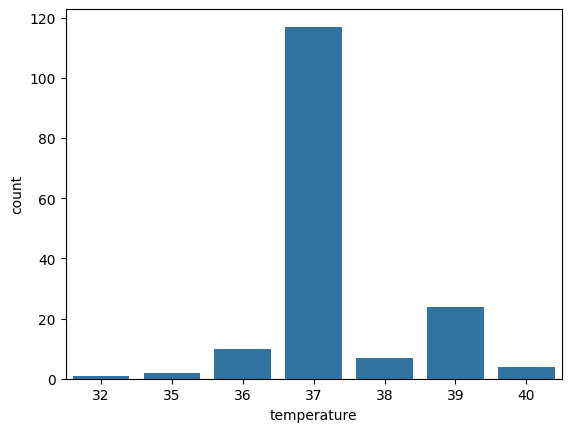

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='temperature', data = data)

# Show the plot
plt.show()

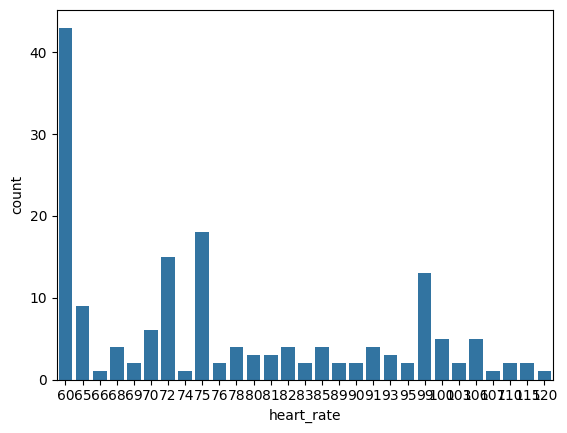

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='heart_rate', data = data)

# Show the plot
plt.show()

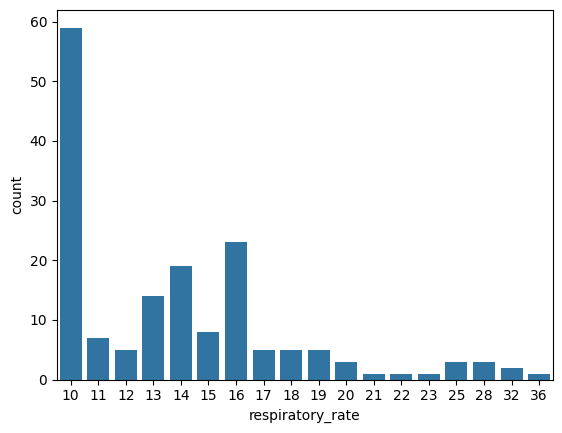

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='respiratory_rate', data = data)

# Show the plot
plt.show()

<Axes: xlabel='patient_ID', ylabel='Density'>

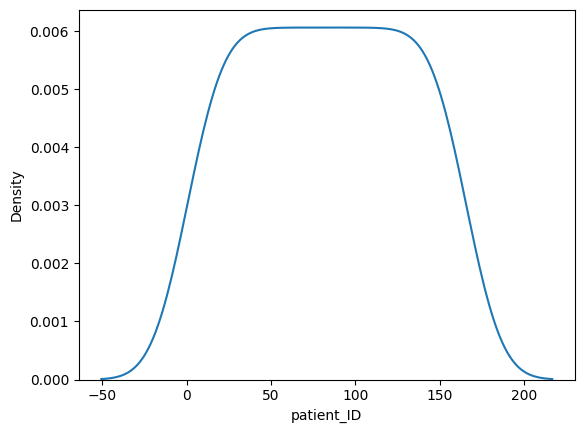

In [ ]:
sns.kdeplot(data['patient_ID'])

<Axes: xlabel='temperature', ylabel='Density'>

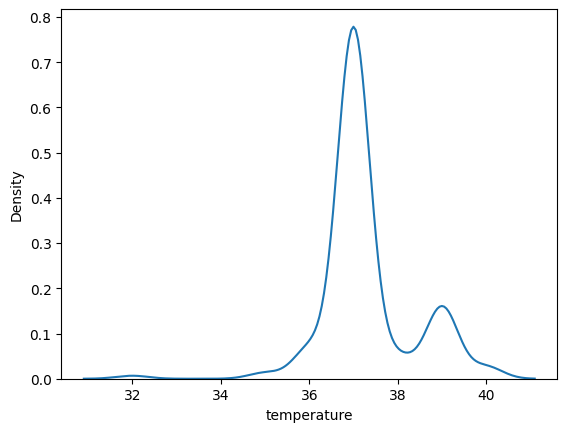

In [ ]:
sns.kdeplot(data['temperature'])

<Axes: xlabel='respiratory_rate', ylabel='Density'>

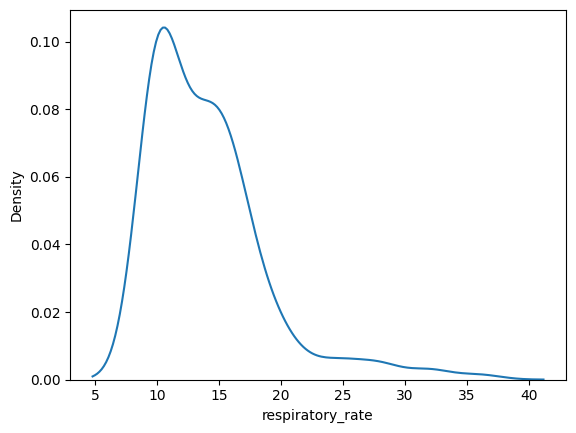

In [ ]:
sns.kdeplot(data['respiratory_rate'])

<Axes: xlabel='distance', ylabel='Density'>

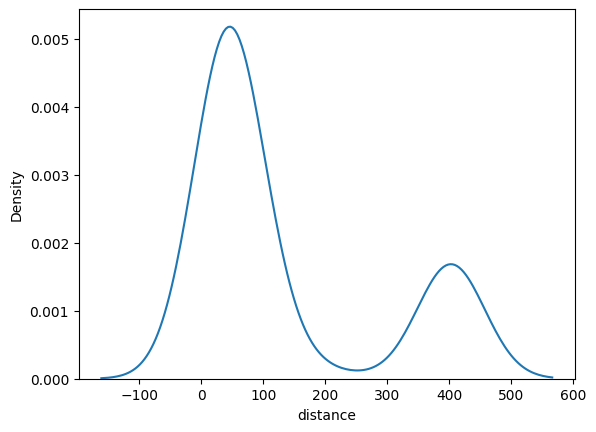

In [ ]:
sns.kdeplot(data['distance'])

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the column 'created_at'
# If 'data' is a CSV file, you can read it into a DataFrame like this:
# data = pd.read_csv('your_file.csv')

# Check the columns in your DataFrame
print("Columns before deletion:")
print(data.columns)

# Drop the 'created_at' column
data.drop(columns=['created_at'], inplace=True)

# Check the columns again to verify that 'created_at' has been deleted
print("Columns after deletion:")
print(data.columns)


Columns before deletion:
Index(['created_at', 'patient_ID', 'heart_rate', 'respiratory_rate',
       'temperature', 'PIR Trigger', 'distance'],
      dtype='object')
Columns after deletion:
Index(['patient_ID', 'heart_rate', 'respiratory_rate', 'temperature',
       'PIR Trigger', 'distance'],
      dtype='object')


<Axes: >

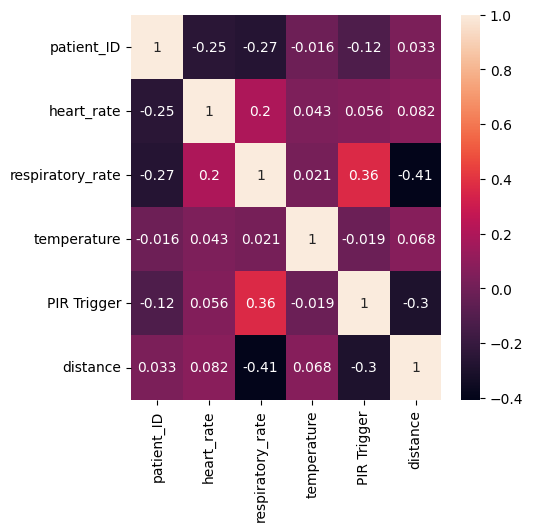

In [ ]:
import seaborn as sns
corr = data.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot = True)

In [ ]:
X = data.drop('patient_ID',axis=1)
X

,heart_rate,respiratory_rate,temperature,PIR Trigger,distance
0,76,15,32,1,15
1,70,15,37,1,15
2,81,12,37,0,32
3,81,14,39,0,241
4,70,15,37,1,15
...,...,...,...,...,...
160,75,14,37,0,45
161,75,14,37,0,45
162,69,14,37,1,70
163,89,19,37,1,90


In [ ]:
y= data['respiratory_rate']
y

0      15
1      15
2      12
3      14
4      15
       ..
160    14
161    14
162    14
163    19
164    10
Name: respiratory_rate, Length: 165, dtype: int64

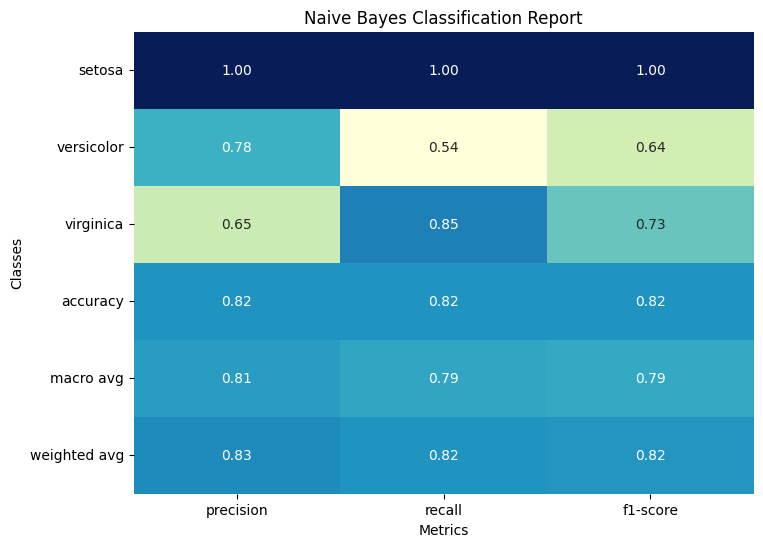

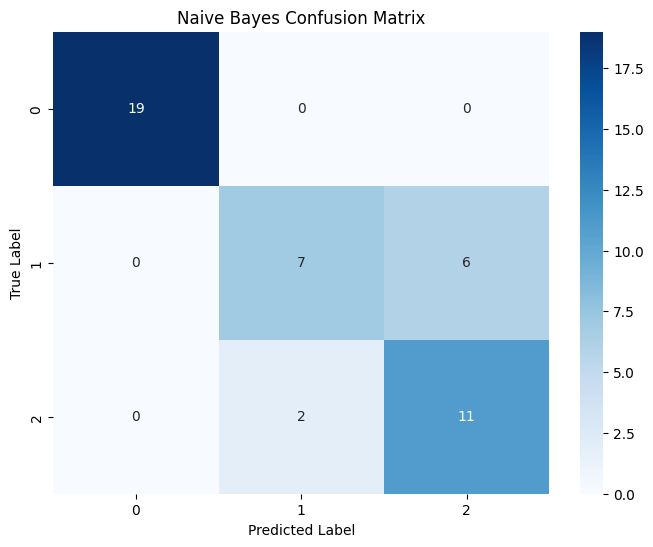

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only take the first two features
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Generate predictions
nb_preds = nb_model.predict(X_test)

# Generate classification report
nb_classification_report = classification_report(y_test, nb_preds, target_names=iris.target_names, output_dict=True)

# Generate confusion matrix
nb_confusion_matrix = confusion_matrix(y_test, nb_preds)

# Plot classification report
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(nb_classification_report).iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
plt.title('Naive Bayes Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion_matrix, annot=True, cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


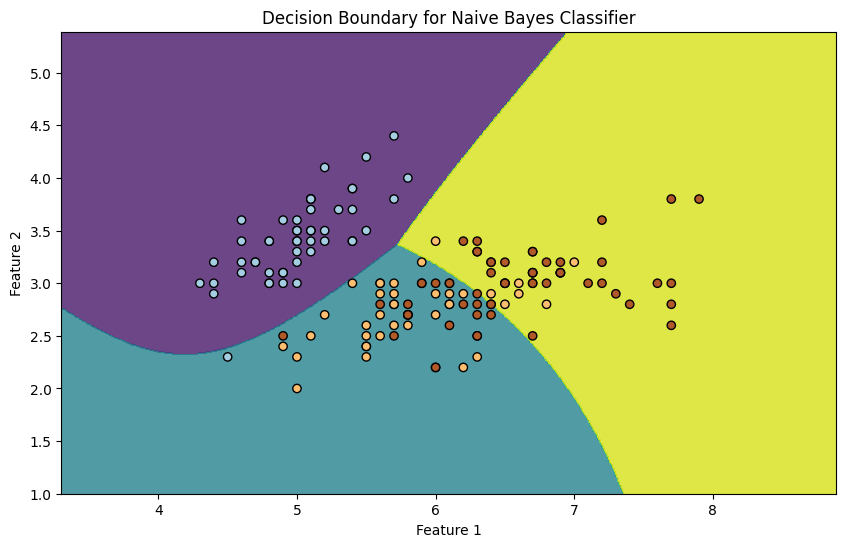

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only take the first two features
y = iris.target

# Initialize and fit the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for Naive Bayes Classifier')
plt.show()


Naive Bayes Accuracy: 0.9
Naive Bayes Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Naive Bayes Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


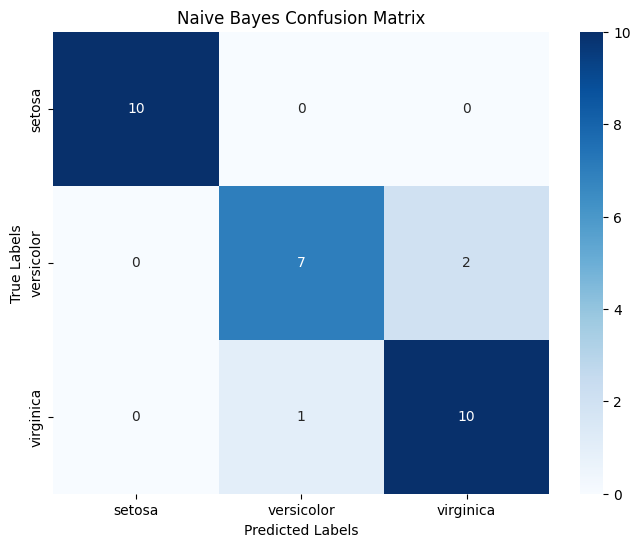

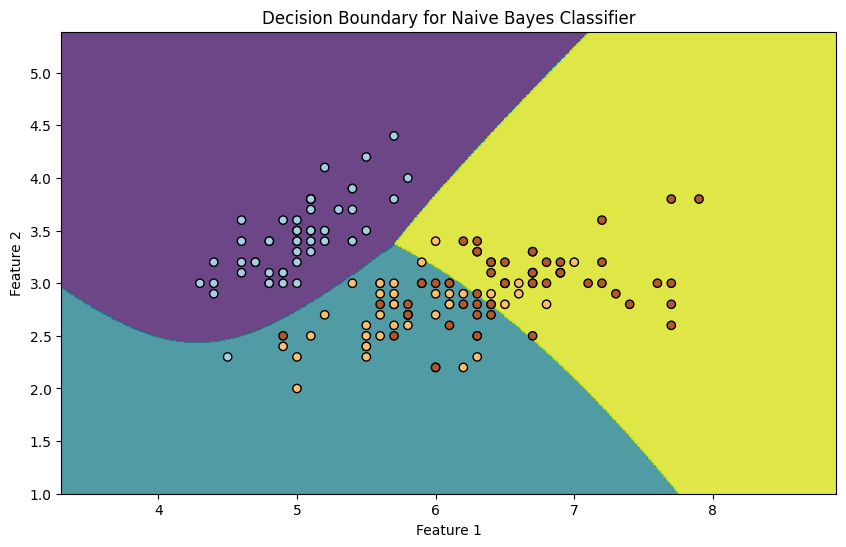

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Only take the first two features
y = iris.target
class_names = iris.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Generate predictions on the test data
y_pred = nb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=class_names)
print("Naive Bayes Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Naive Bayes Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = nb_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for Naive Bayes Classifier')
plt.show()


SVM Accuracy: 0.9
SVM Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

SVM Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


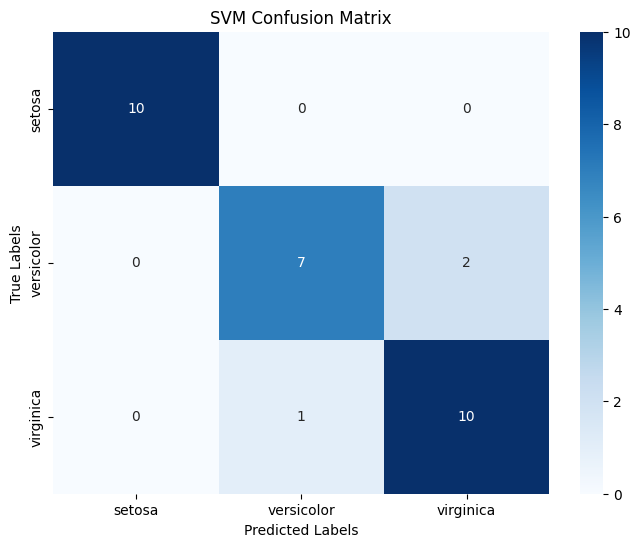

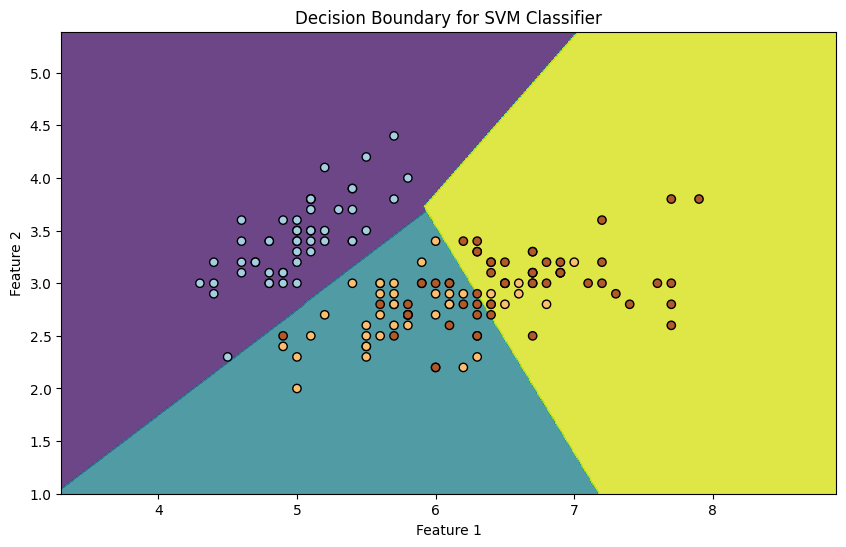

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Only take the first two features
y = iris.target
class_names = iris.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# Generate predictions on the test data
y_pred = svm_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=class_names)
print("SVM Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("SVM Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for SVM Classifier')
plt.show()


#  Naive Bayes Algorithm

In [ ]:
columns_with_missing = list(('heart_rate','respiratory_rate','temperature','distance'))

In [ ]:
import numpy as np
import pandas as pd
unknown_values = [np.nan] * len(columns_with_missing)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


Decision Tree Accuracy: 0.6666666666666666
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.43      0.46      0.44        13
           2       0.46      0.46      0.46        13

    accuracy                           0.67        45
   macro avg       0.63      0.62      0.63        45
weighted avg       0.68      0.67      0.67        45

Decision Tree Confusion Matrix:
[[18  1  0]
 [ 0  6  7]
 [ 0  7  6]]


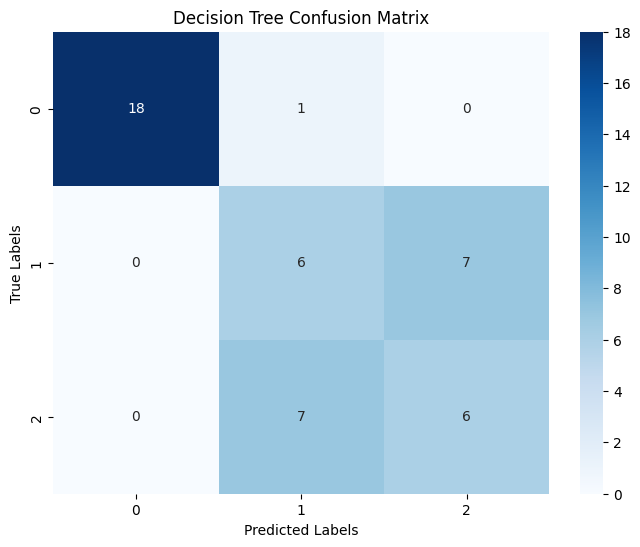

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have your feature matrix X and target vector y prepared
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
dt_preds = dt_classifier.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_preds)
print("Decision Tree Accuracy:", dt_accuracy)

# Generate classification report
dt_classification_report = classification_report(y_test, dt_preds)
print("Decision Tree Classification Report:")
print(dt_classification_report)

# Generate confusion matrix
dt_confusion_matrix = confusion_matrix(y_test, dt_preds)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Logistic Regression Accuracy: 0.8222222222222222
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.78      0.54      0.64        13
           2       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45

Logistic Regression Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  2 11]]


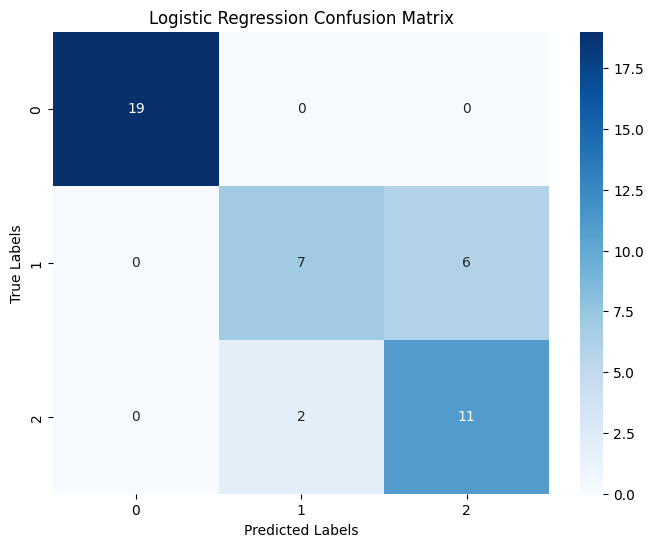

Random Forest Accuracy: 0.7555555555555555
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.58      0.54      0.56        13
           2       0.57      0.62      0.59        13

    accuracy                           0.76        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.76      0.76      0.76        45

Random Forest Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  5  8]]


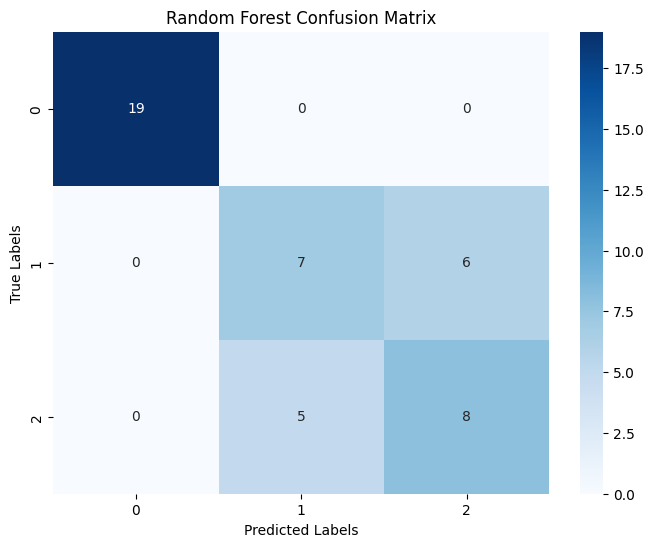

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logistic_regression_preds = logistic_regression.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_preds)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)

# Generate classification report for Logistic Regression
logistic_regression_classification_report = classification_report(y_test, logistic_regression_preds)
print("Logistic Regression Classification Report:")
print(logistic_regression_classification_report)

# Generate confusion matrix for Logistic Regression
logistic_regression_confusion_matrix = confusion_matrix(y_test, logistic_regression_preds)
print("Logistic Regression Confusion Matrix:")
print(logistic_regression_confusion_matrix)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_regression_confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_preds)
print("Random Forest Accuracy:", random_forest_accuracy)

# Generate classification report for Random Forest
random_forest_classification_report = classification_report(y_test, random_forest_preds)
print("Random Forest Classification Report:")
print(random_forest_classification_report)

# Generate confusion matrix for Random Forest
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_preds)
print("Random Forest Confusion Matrix:")
print(random_forest_confusion_matrix)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(random_forest_confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Accuracy: 1.0


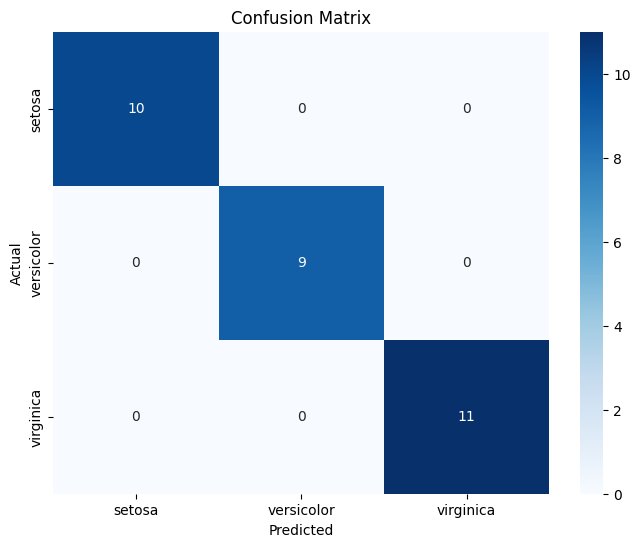

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



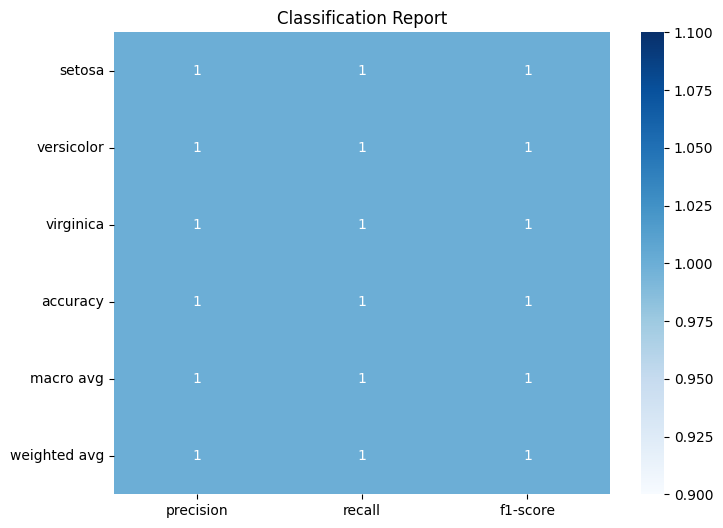

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Plot classification report
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()


Logistic Regression Accuracy: 1.0
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Logistic Regression Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


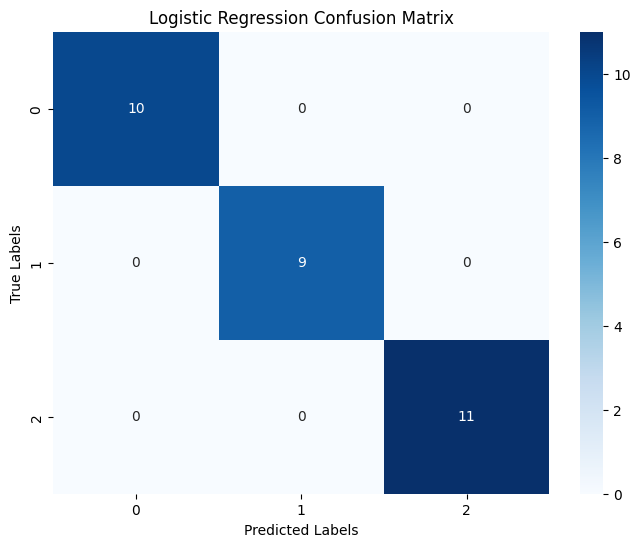

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logistic_regression_preds = logistic_regression.predict(X_test)

# Calculate accuracy
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_preds)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)

# Generate classification report
logistic_regression_classification_report = classification_report(y_test, logistic_regression_preds)
print("Logistic Regression Classification Report:")
print(logistic_regression_classification_report)

# Generate confusion matrix
logistic_regression_confusion_matrix = confusion_matrix(y_test, logistic_regression_preds)
print("Logistic Regression Confusion Matrix:")
print(logistic_regression_confusion_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_regression_confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


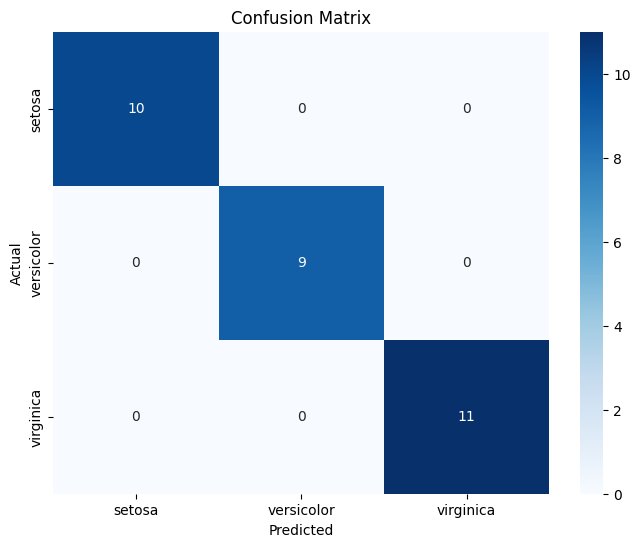

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


SVM Accuracy: 1.0
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

SVM Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


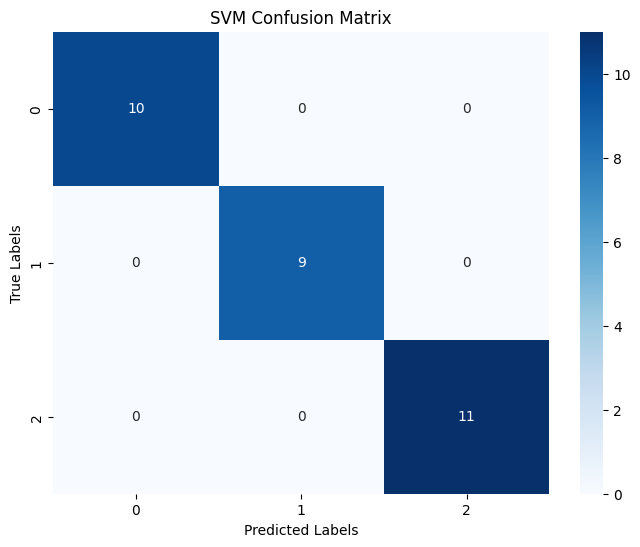

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
svm_preds = svm_clf.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_accuracy)

# Generate classification report
svm_classification_report = classification_report(y_test, svm_preds)
print("SVM Classification Report:")
print(svm_classification_report)

# Generate confusion matrix
svm_confusion_matrix = confusion_matrix(y_test, svm_preds)
print("SVM Confusion Matrix:")
print(svm_confusion_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


RANDOM FOREST CLASSIFIER

Random Forest Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Random Forest Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


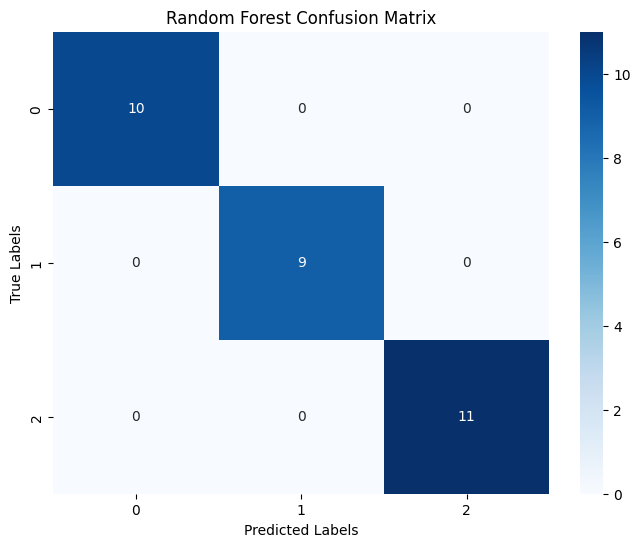

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_test)

# Calculate accuracy
random_forest_accuracy = accuracy_score(y_test, random_forest_preds)
print("Random Forest Accuracy:", random_forest_accuracy)

# Generate classification report
random_forest_classification_report = classification_report(y_test, random_forest_preds)
print("Random Forest Classification Report:")
print(random_forest_classification_report)

# Generate confusion matrix
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_preds)
print("Random Forest Confusion Matrix:")
print(random_forest_confusion_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(random_forest_confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Logistic Regression Accuracy: 1.0
Logistic Regression Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Logistic Regression Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


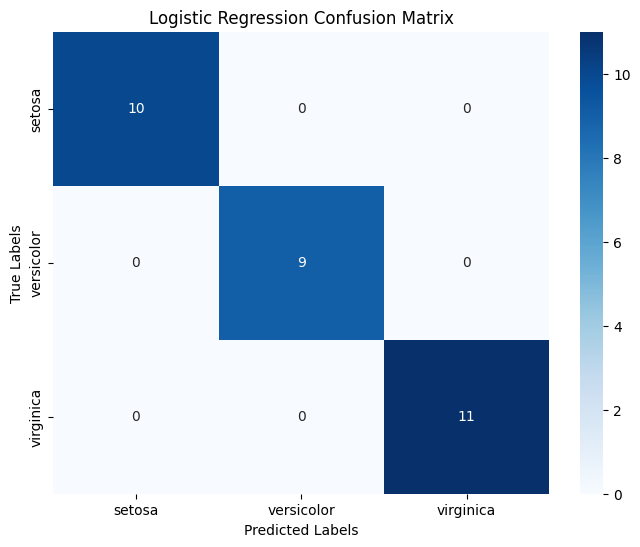

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression classifier
log_reg_clf = LogisticRegression()
log_reg_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=class_names)
print("Logistic Regression Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Logistic Regression Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Decision Tree Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


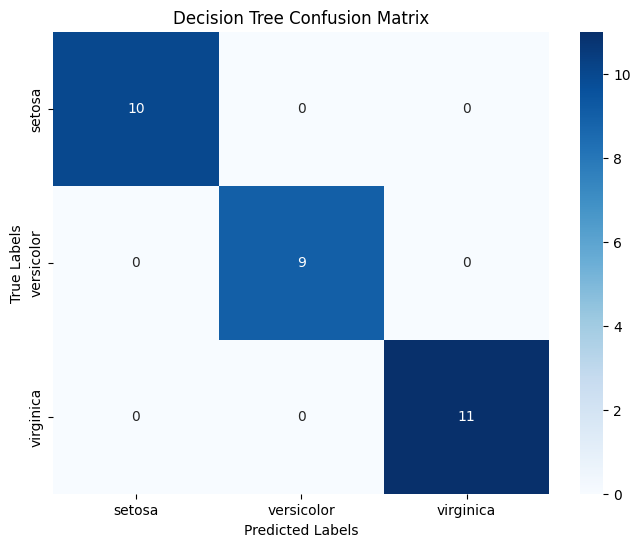

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=class_names)
print("Decision Tree Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Decision Tree Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


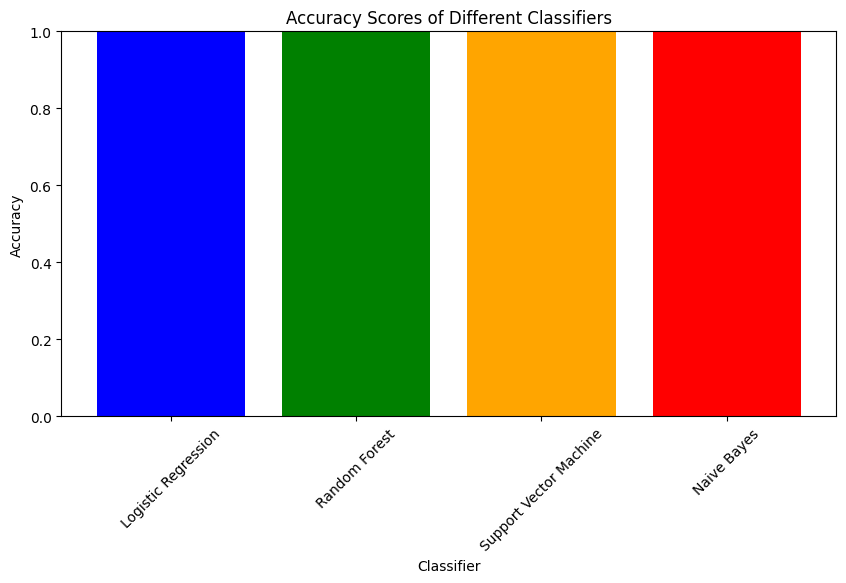

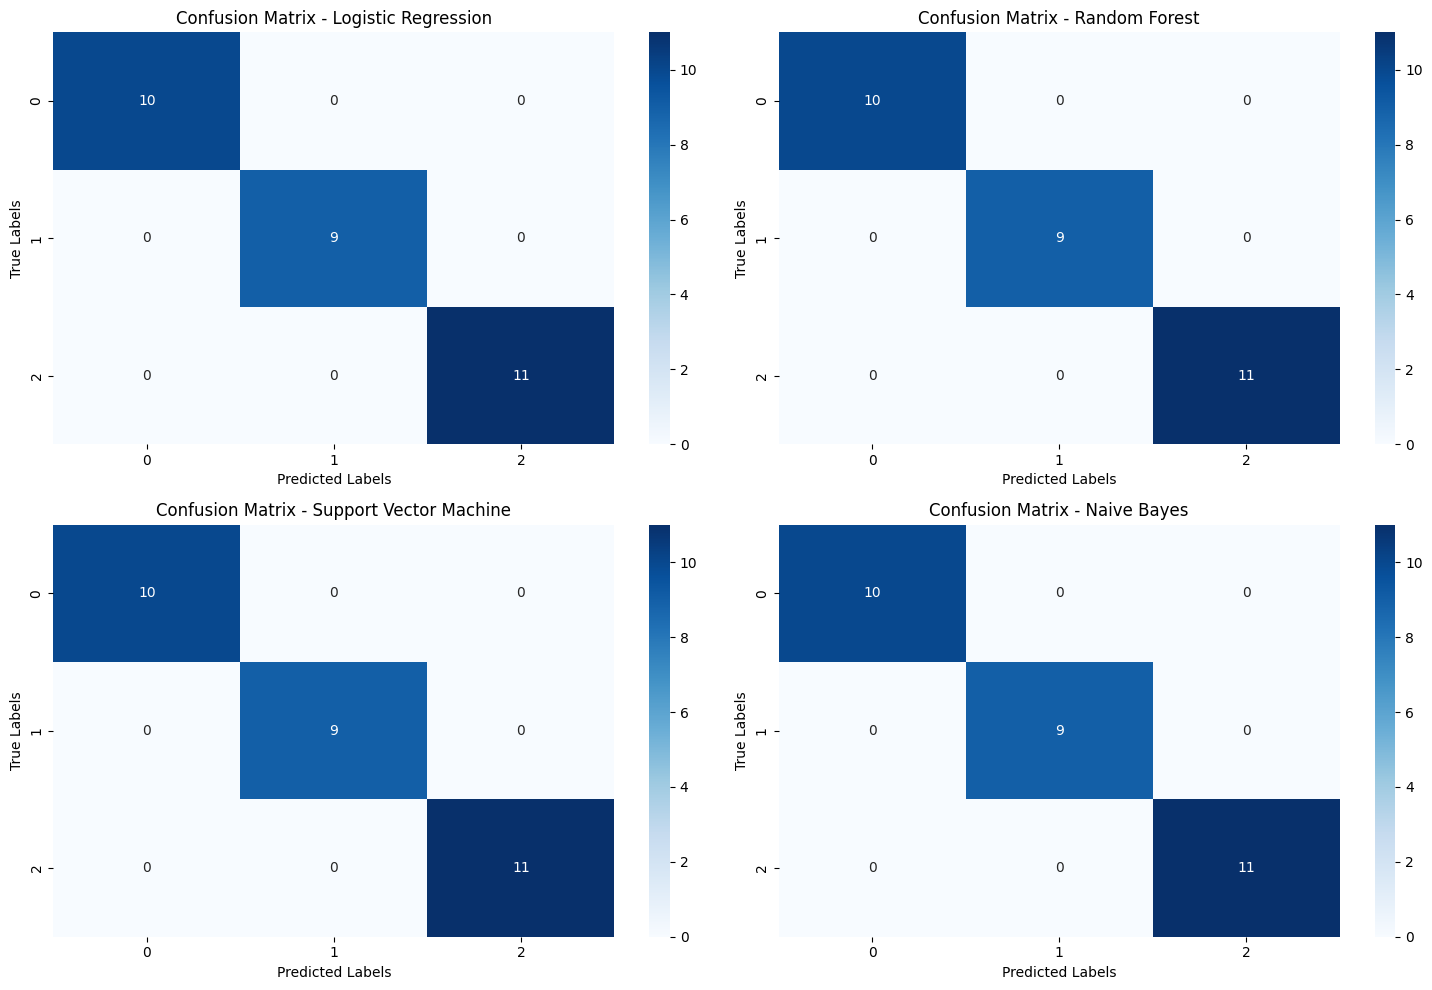

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

# Initialize dictionaries to store metrics
accuracy_scores = {}
classification_reports = {}
confusion_matrices = {}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    # Train classifier
    clf.fit(X_train, y_train)

    # Make predictions
    preds = clf.predict(X_test)

    # Calculate accuracy
    accuracy_scores[name] = accuracy_score(y_test, preds)

    # Generate classification report
    classification_reports[name] = classification_report(y_test, preds, output_dict=True)

    # Generate confusion matrix
    confusion_matrices[name] = confusion_matrix(y_test, preds)

# Plot accuracy scores
plt.figure(figsize=(10, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Accuracy Scores of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Plot confusion matrices
plt.figure(figsize=(15, 10))
for i, (name, matrix) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(matrix, annot=True, cmap="Blues", fmt="d")
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# Print classification reports


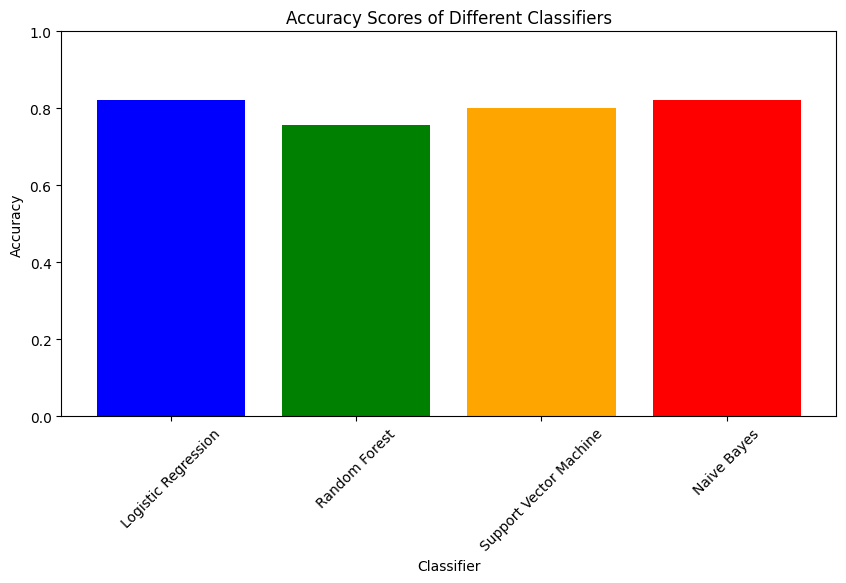

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

# Initialize list to store accuracy scores
accuracy_scores = []

# Train and evaluate classifiers
for name, clf in classifiers.items():
    # Train classifier
    clf.fit(X_train, y_train)

    # Make predictions
    preds = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, preds)
    accuracy_scores.append((name, accuracy))

# Plot accuracy scores
plt.figure(figsize=(10, 5))
classifiers_names, accuracies = zip(*accuracy_scores)
plt.bar(classifiers_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Accuracy Scores of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Train classifiers
classifier1 = LogisticRegression()
classifier2 = RandomForestClassifier(n_estimators=100)
classifier3 = SVC()
classifier4 = GaussianNB()

# Fit classifiers
classifier1.fit(X_train, y_train)
classifier2.fit(X_train, y_train)
classifier3.fit(X_train, y_train)
classifier4.fit(X_train, y_train)

# Predictions
preds1 = classifier1.predict(X_test)
preds2 = classifier2.predict(X_test)
preds3 = classifier3.predict(X_test)
preds4 = classifier4.predict(X_test)

# Count votes
votes = {}
for pred in [preds1, preds2, preds3, preds4]:
    for i, p in enumerate(pred):
        if i not in votes:
            votes[i] = {'high': 0, 'low': 0}
        if p == 'high':
            votes[i]['high'] += 1
        else:
            votes[i]['low'] += 1

# Final prediction
final_predictions = []
for i, vote_count in votes.items():
    if vote_count['high'] > vote_count['low']:
        final_predictions.append('high')
    else:
        final_predictions.append('low')

print("Final predictions:", final_predictions)


Final predictions: ['low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low']


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Assuming X_train and y_train are already defined
classifier1 = RandomForestClassifier()
classifier2 = GradientBoostingClassifier()
classifier3 = SVC()
classifier4 = DecisionTreeClassifier()

# Train the classifiers
classifier1.fit(X_train, y_train)
classifier2.fit(X_train, y_train)
classifier3.fit(X_train, y_train)
classifier4.fit(X_train, y_train)

# Make a single prediction
test_sample = X_test[0].reshape(1, -1)  # Assuming X_test is a NumPy array
predictions = []

for classifier in [classifier1, classifier2, classifier3, classifier4]:
    predictions.append(classifier.predict(test_sample))

votes = {'high': 0, 'low': 0}
for pred in predictions:
    if pred == 'high':
        votes['high'] += 1
    else:
        votes['low'] += 1

final_prediction = 'high' if votes['high'] > votes['low'] else 'low'
print("Final prediction:", final_prediction)


Final prediction: low
